"""
案例: 演示 KNN算法 识别图片, 即: 手写数字识别案例.

介绍:
    每张图片都是由 28 * 28 像素组成的, 即: 我们的csv文件中每一行都有 784个像素点, 表示图片(每个像素)的 颜色.
    最终构成图像.
"""

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib
from collections import Counter

# 扩展: 忽略警告.
import warnings
warnings.filterwarnings('ignore', module='sklearn') # 参1: 忽略警告, 参2: 忽略的模块.

# 1. 定义函数, 接收用户传入的索引, 展示 该索引对应的图片.

In [2]:


def show_digit(idx):
    # 1. 读取数据集, 获取到源数据.
    df = pd.read_csv('./data/手写数字识别.csv')
    # print(df)       # (42000行 * 785列)

    # 2. 判断传入的索引是否越界.
    if idx < 0 or idx > len(df) - 1:
        print('索引越界!')
        return

    # 3. 走这里, 说明没有越界, 就正常获取数据.
    x = df.iloc[:, 1:]
    y = df.iloc[:, 0]

    # 4. 查看用户传入的索引对应的图片 -> 是几?
    print(f'该图片对应的数字是: {y.iloc[idx]}')
    print(f'查看所有的标签的分布情况: {Counter(y)}')

    # 5. 查看下 用户传入的索引对应的图片 的形状
    print(x.iloc[idx].shape)       # (784,)  我们要想办法把 (784,) 转换成 (28, 28)
    # print(x.iloc[idx].values)      # 具体的784个像素点数据

    # 6. 把 (784,) 转换成 (28, 28)
    x = x.iloc[idx].values.reshape(28, 28)
    # print(x)   # 28 * 28像素点

    # 7. 具体的绘制灰度图的动作.
    plt.imshow(x, cmap='gray')      # 灰度图
    plt.axis('off')                 # 不显示坐标轴
    plt.show()


该图片对应的数字是: 3
查看所有的标签的分布情况: Counter({1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795})
(784,)


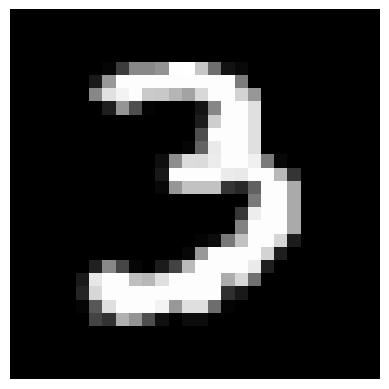

该图片对应的数字是: 8
查看所有的标签的分布情况: Counter({1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795})
(784,)


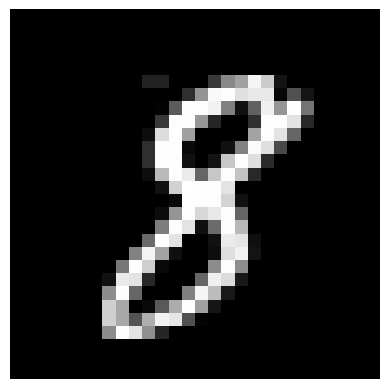

该图片对应的数字是: 0
查看所有的标签的分布情况: Counter({1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795})
(784,)


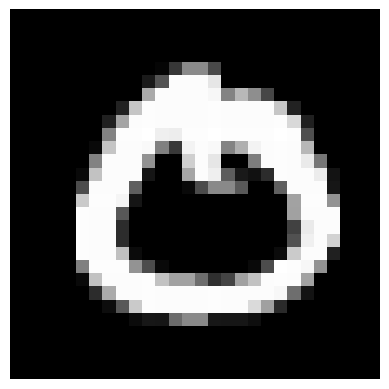

In [3]:
    show_digit(9)
    show_digit(20)
    show_digit(23)

# 2. 定义函数, 训练模型, 并保存训练好的模型.

In [4]:
def train_model():
    # 1. 加载数据集.
    df = pd.read_csv('./data/手写数字识别.csv')
    # 2. 数据的预处理.
    # 2.1 拆分出特征列.
    x = df.iloc[:, 1:]      # 特征列.
    # 2.2 拆分出标签列.
    y = df.iloc[:, 0]       # 标签列.
    # 2.3 打印特征和标签的形状
    print(f'x的形状: {x.shape}')       # (42000, 784)
    print(f'y的形状: {y.shape}')       # (42000,)
    print(f'查看所有的标签的分布情况: {Counter(y)}')
    # 2.4 对特征列(拆分前)进行 归一化.
    x = x / 255
    # 2.5 拆分训练集和测试集.
    # 参1: 特征列.    参2: 标签列.      参3: 测试集的比例.    参4: 随机种子.      参5: 参考y值进行抽取, 保持标签的比例(数据均衡)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y)

    # 3. 模型训练.
    # 3.1 创建模型对象.
    estimator = KNeighborsClassifier(n_neighbors=3)
    # 3.2 模型训练.
    estimator.fit(x_train, y_train)

    # 4. 模型评估.
    print(f'准确率: {estimator.score(x_test, y_test)}')
    print(f'准确率: {accuracy_score(y_test, estimator.predict(x_test))}')

    # 5. 保存模型.
    # 参1: 模型对象.    参2: 模型保存的路径.
    joblib.dump(estimator, './model/手写数字识别.pkl')        # pickle文件: Python(Pandas)独有的文件类型.
    print('模型保存成功!')

In [5]:
 train_model()

x的形状: (42000, 784)
y的形状: (42000,)
查看所有的标签的分布情况: Counter({1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795})
准确率: 0.9657142857142857
准确率: 0.9657142857142857
模型保存成功!


# 3. 定义函数, 测试模型.

In [6]:
def use_model():
    # 1. 加载图片.
    x = plt.imread('./data/demo.png')       # 28 * 28像素
    # 2. 绘制图片.
    # plt.imshow(x, cmap='gray')              # 灰度图
    # plt.axis('off')                         # 不显示坐标轴
    # plt.show()

    # 3. 加载模型.
    estimator = joblib.load('./model/手写数字识别.pkl')

    # 4. 模型预测.
    # 4.1 查看 数据集转换.
    print(x.shape)                  # (28, 28)
    print(x.reshape(1, 784).shape)  # (1, 784)
    print(x.reshape(1, -1).shape)   # 效果等同于 (1, 784), 语法糖.

    # 4.2 具体的转换动作, 记得: 归一化(因为训练模型的时候 使用了 归一化动作)
    # x = x.reshape(1, -1) / 255      # 可能会预测失败, 因为读图的时候, 像素值可能不是特别的精准.
    x = x.reshape(1, -1)              # 用原始的读取到的像素值, 做预测.

    # 4.3 模型预测.
    y_pre = estimator.predict(x)

    # 5. 打印预测结果.
    print(f'预测值为: {y_pre}')

In [7]:
 use_model()

(28, 28)
(1, 784)
(1, 784)
预测值为: [2]
